In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [78]:
def phi_pol(x, orden):
    pol = []
    for i in orden:
            pol.append(x**int(i))
    return np.array(pol).T


def MAP(x, y, orden, basis='pol', reg=0):
    """
    Retorna:
    t: estimador MAP
    p@t: regresion
    """
    d = len(orden)
    if basis=='pol':
        p = phi_pol(x, orden=orden)
    t = np.linalg.inv(p.T@p + reg*np.ones((d, d)))@p.T@y
    return t, p@t


$Y = \Phi(X) \theta + \eta$

$\theta_{\text{MAP}} = (\Phi^{T}(X)\Phi(X))^{-1} \Phi^{T}(X) Y$

$\theta_{\text{MAP}} = (\Phi^{T}(X)\Phi(X) + \rho \mathbb{1})^{-1} \Phi^{T}(X) Y$

$\Phi(X) \in N \text{x} D$

Text(0.5,1,'conjunto de datos')

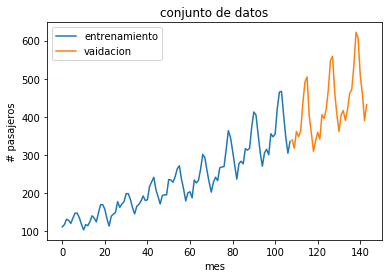

In [2]:
data = np.loadtxt('datosT2.txt')
n_train = int(12*9)
mes_train = data[:n_train, 0]
pax_train = data[:n_train, 1]
mes_val = data[n_train:, 0]
pax_val = data[n_train:, 1]
plt.plot(mes_train, pax_train, label='entrenamiento')
plt.plot(mes_val, pax_val, label='vaidacion')
plt.legend()
plt.xlabel('mes')
plt.ylabel('# pasajeros')
plt.title('conjunto de datos')

In [81]:
theta_map, reg = MAP(mes_train, pax_train, orden=np.arange(1, 5, 1), basis='pol', reg=1)

In [82]:
print(theta_map)

[ 1.47722714e+01 -4.29954151e-01  5.46826476e-03 -2.28112509e-05]


Text(0.5,1,'conjunto de datos')

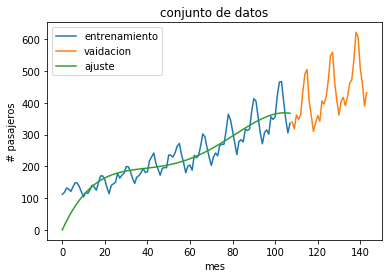

In [84]:
data = np.loadtxt('datosT2.txt')
n_train = int(12*9)
mes_train = data[:n_train, 0]
pax_train = data[:n_train, 1]
mes_val = data[n_train:, 0]
pax_val = data[n_train:, 1]
plt.plot(mes_train, pax_train, label='entrenamiento')
plt.plot(mes_val, pax_val, label='vaidacion')
plt.plot(mes_train, reg, label='ajuste')
plt.legend()
plt.xlabel('mes')
plt.ylabel('# pasajeros')
plt.title('conjunto de datos')